In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
#reading file
df=pd.read_csv('/content/insurance_claims.csv')

In [13]:
#understanding the data
df.shape

(10000, 19)

In [14]:
df.count()

,0
PolicyholderOccupation,10000
FirstPartyVehicleType,10000
PolicyholderPostCode,10000
PolicyWasSubscribedOnInternet,10000
NumberOfPoliciesOfPolicyholder,10000
FpVehicleAgeMonths,10000
PolicyHolderAge,10000
FirstPartyLiability,10000
ClaimCause,10000
ClaimInvolvedCovers,10000


In [15]:
df.head()

,PolicyholderOccupation,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,FirstPartyLiability,ClaimCause,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,3,1,75165,0,2,76,31,0.121587,1,2,5,0,81328,0.652447,0,37246.774861,17,0,0.0
1,5,0,45809,1,1,97,67,0.612870,4,0,8,0,88724,0.676261,0,32925.571674,19,1,0.0
2,0,3,42165,0,1,176,76,0.871980,2,1,1,0,68441,0.851770,0,5817.983955,22,0,0.0
3,2,0,82232,0,1,151,71,0.500794,1,2,9,0,44767,0.926641,0,48698.053138,22,0,0.0
4,0,2,85642,0,1,81,28,0.771998,1,2,8,0,46852,0.353562,0,38666.693932,4,0,0.0


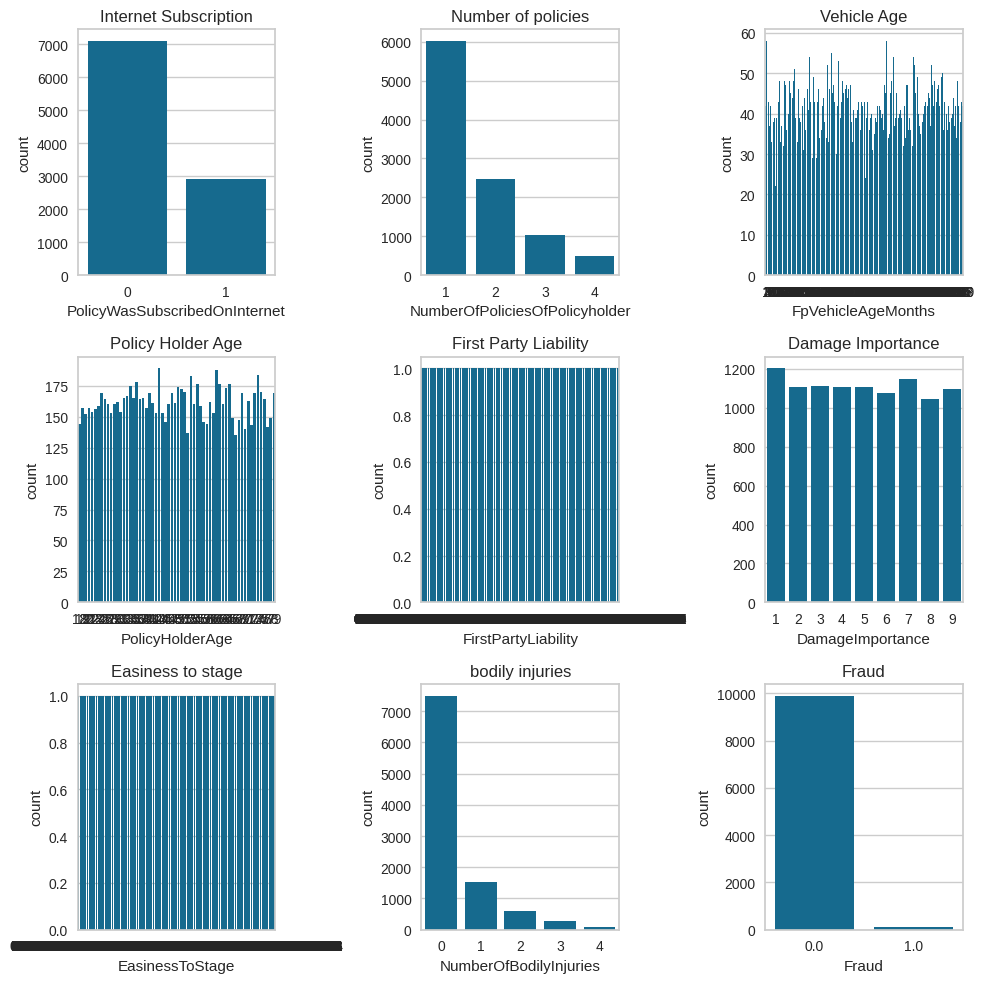

In [16]:
# Countplot for categorical variables
plt.figure(figsize=(10, 10))

# Internet Subscription
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='PolicyWasSubscribedOnInternet')
plt.title('Internet Subscription')

# Number of policies of policy holder
plt.subplot(3, 3, 2)
sns.countplot(data=df, x='NumberOfPoliciesOfPolicyholder')
plt.title('Number of policies')

# FP Vehicle Age
plt.subplot(3, 3, 3)
sns.countplot(data=df, x='FpVehicleAgeMonths')
plt.title('Vehicle Age')

# Policy Holder Age
plt.subplot(3, 3, 4)
sns.countplot(data=df, x='PolicyHolderAge')
plt.title('Policy Holder Age')

# First Party Liability
plt.subplot(3, 3, 5)
sns.countplot(data=df, x='FirstPartyLiability')
plt.title('First Party Liability')

# Damage Importance
plt.subplot(3, 3, 6)
sns.countplot(data=df, x='DamageImportance')
plt.title('Damage Importance')

# Easiness to stage
plt.subplot(3, 3, 7)
sns.countplot(data=df, x='EasinessToStage')
plt.title('Easiness to stage')

# Number of bodily Injuries
plt.subplot(3, 3, 8)
sns.countplot(data=df, x='NumberOfBodilyInjuries')
plt.title('bodily injuries')

# Fraud
plt.subplot(3, 3, 9)
sns.countplot(data=df, x='Fraud')
plt.title('Fraud')

plt.tight_layout()
plt.show()

In [17]:
#checking if the data has any null values and filling it
print(df.isnull().sum())
df.fillna(0, inplace=True)
df = pd.get_dummies(df, columns=['PolicyholderOccupation', 'FirstPartyVehicleType', 'ClaimCause', 'ClaimInvolvedCovers','ConnectionBetweenParties'], drop_first=True)
df.head()

PolicyholderOccupation              0
FirstPartyVehicleType               0
PolicyholderPostCode                0
PolicyWasSubscribedOnInternet       0
NumberOfPoliciesOfPolicyholder      0
FpVehicleAgeMonths                  0
PolicyHolderAge                     0
FirstPartyLiability                 0
ClaimCause                          0
ClaimInvolvedCovers                 0
DamageImportance                    0
ConnectionBetweenParties            0
LossPostCode                        0
EasinessToStage                     0
ClaimWithoutIdentifiedThirdParty    0
ClaimAmount                         0
LossHour                            0
NumberOfBodilyInjuries              0
Fraud                               0
dtype: int64


,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,FirstPartyLiability,DamageImportance,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,...,FirstPartyVehicleType_3,FirstPartyVehicleType_4,ClaimCause_1,ClaimCause_2,ClaimCause_3,ClaimCause_4,ClaimInvolvedCovers_1,ClaimInvolvedCovers_2,ClaimInvolvedCovers_3,ConnectionBetweenParties_1
0,75165,0,2,76,31,0.121587,5,81328,0.652447,0,...,False,False,True,False,False,False,False,True,False,False
1,45809,1,1,97,67,0.612870,8,88724,0.676261,0,...,False,False,False,False,False,True,False,False,False,False
2,42165,0,1,176,76,0.871980,1,68441,0.851770,0,...,True,False,False,True,False,False,True,False,False,False
3,82232,0,1,151,71,0.500794,9,44767,0.926641,0,...,False,False,True,False,False,False,False,True,False,False
4,85642,0,1,81,28,0.771998,8,46852,0.353562,0,...,False,False,True,False,False,False,False,True,False,False


In [18]:
#understanding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderPostCode              10000 non-null  int64  
 1   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 2   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 3   FpVehicleAgeMonths                10000 non-null  int64  
 4   PolicyHolderAge                   10000 non-null  int64  
 5   FirstPartyLiability               10000 non-null  float64
 6   DamageImportance                  10000 non-null  int64  
 7   LossPostCode                      10000 non-null  int64  
 8   EasinessToStage                   10000 non-null  float64
 9   ClaimWithoutIdentifiedThirdParty  10000 non-null  int64  
 10  ClaimAmount                       10000 non-null  float64
 11  LossHour                          10000 non-null  int64  
 12  Numbe

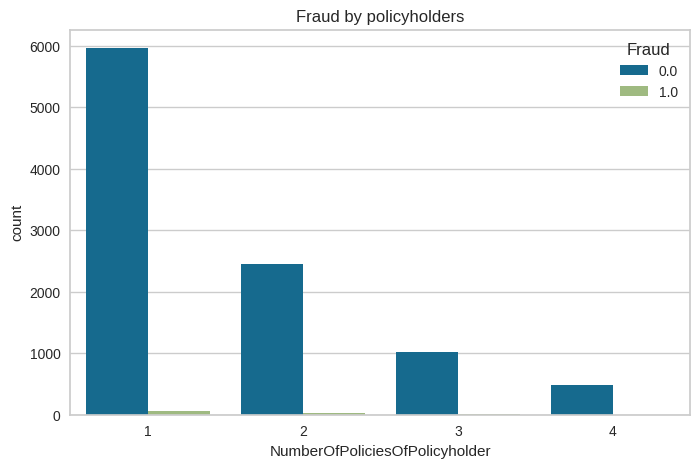

In [19]:
#visualising fraud by policyholders
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NumberOfPoliciesOfPolicyholder', hue='Fraud')
plt.title('Fraud by policyholders')
plt.show()

In [3]:
#dropping unnecessary columns
columns_to_drop = ['PolicyholderNumber', 'FirstPartyVehicleNumber', 'ReferenceId', 'ThirdPartyVehicleNumber', 'InsurerNotes', 'LossDate', 'FirstPolicySubscriptionDate']
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
#converting categorical data to numeric
cat_columns = ['PolicyholderOccupation', 'FirstPartyVehicleType', 'ClaimCause', 'ClaimInvolvedCovers', 'ConnectionBetweenParties']
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [5]:
#splitting data into independent and dependent variables
X = df.drop(columns=['Fraud'])
y = df['Fraud']

In [6]:
#applying SMOTE to balance data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
#splitting data into 20% test and 80% train size
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [8]:
#applied standardscaler for data to be normally distributed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#applied logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [10]:
#evaluating the efficiency of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

In [11]:
#printing evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.7171717171717171
Confusion Matrix:
[[1320  684]
 [ 436 1520]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      2004
         1.0       0.69      0.78      0.73      1956

    accuracy                           0.72      3960
   macro avg       0.72      0.72      0.72      3960
weighted avg       0.72      0.72      0.72      3960

AUC-ROC: 0.7788


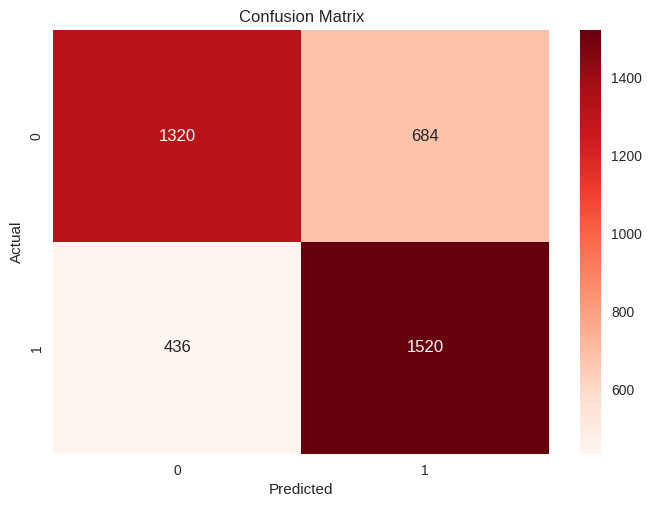

In [12]:
#visualisation through confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Recommendations and Insights**



*   Out of total number of testing samples (3960), type I error (False negatives) is 684 samples and type II (false positives) error is 436 samples. This shows that the model is making mistakes.
*   Model's accuracy is around 72%, but there is still room for improvement with rebalancing and resampling.
*   Recall for both, fraud (78%) and non-fraud (66%), is greater than 65% which tells us that more than 65% of the times model is successful in capturing type I and type II errors.
*   after balancing, SMOTE generated synthetic frauds (9800) to match non-fraud (9900) making it a total of 19,800 samples (including 100 samples of original fraud). From which 15,840 samples were used to train the model and 3,960 samples were used to test the model.
*   we must check if the variables are overfitting the model or underfitting it and adding or removing variables might improve accuracy.   


